In [ ]:
from google.colab import drive
drive.mount("/content/drive")

file_path = "/content/drive/My Drive/D&C/MOSAIKS/Poverty_Mapping/Trial1/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Preparation**

In [ ]:
import numpy as np
import pandas as pd

# Reading the csv for the gps file
gps_raw = pd.read_csv(file_path + 'Geographic Dataset.csv')
gps_raw.rename(columns = {'DHSCLUST':'CLUSTNUM'}, inplace = True)
gps_raw.head()

,X,Y,DHSID,DHSCC,DHSYEAR,CLUSTNUM,CCFIPS,ADM1FIPS,ADM1FIPSNA,ADM1SALBNA,...,ADM1NAME,DHSREGCO,DHSREGNA,SOURCE,URBAN_RURA,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,DATUM
0,120.564542,18.271892,PH201700000386,PH,2017.0,386.0,NaN,NaN,NaN,NaN,...,Ilocos,1.0,Ilocos,GPS,R,18.271892,120.564542,9999.0,17.0,WGS84
1,120.568506,18.202195,PH201700000387,PH,2017.0,387.0,NaN,NaN,NaN,NaN,...,Ilocos,1.0,Ilocos,GPS,U,18.202195,120.568506,9999.0,10.0,WGS84
2,120.691113,18.073914,PH201700000388,PH,2017.0,388.0,NaN,NaN,NaN,NaN,...,Ilocos,1.0,Ilocos,GPS,R,18.073914,120.691113,9999.0,39.0,WGS84
3,120.510203,18.061017,PH201700000389,PH,2017.0,389.0,NaN,NaN,NaN,NaN,...,Ilocos,1.0,Ilocos,GPS,R,18.061017,120.510203,9999.0,13.0,WGS84
4,120.663074,18.155694,PH201700000390,PH,2017.0,390.0,NaN,NaN,NaN,NaN,...,Ilocos,1.0,Ilocos,GPS,R,18.155694,120.663074,9999.0,126.0,WGS84


In [ ]:
len(gps_raw)

1250

In [ ]:
# Adding the corresponding radius
gps_raw['RADIUS(KM)'] = np.where(gps_raw['URBAN_RURA'] == 'U', 2, 10)

# Selecting relevant columns only
gps = gps_raw[['DHSID', 'CLUSTNUM', 'URBAN_RURA', 'RADIUS(KM)', 'LATNUM', 'LONGNUM',]]
gps 

,DHSID,CLUSTNUM,URBAN_RURA,RADIUS(KM),LATNUM,LONGNUM
0,PH201700000386,386.0,R,10,18.271892,120.564542
1,PH201700000387,387.0,U,2,18.202195,120.568506
2,PH201700000388,388.0,R,10,18.073914,120.691113
3,PH201700000389,389.0,R,10,18.061017,120.510203
4,PH201700000390,390.0,R,10,18.155694,120.663074
...,...,...,...,...,...,...
1245,PH201700000722,722.0,R,10,12.480412,122.014801
1246,PH201700000723,723.0,R,10,12.332112,121.948492
1247,PH201700000724,724.0,R,10,12.825163,122.082036
1248,PH201700000725,725.0,R,10,12.506513,122.308962


In [ ]:
gps.rename(columns = {'LATNUM':'LAT_GPS', 'LONGNUM':'LON_GPS'}, inplace = True)
gps.head()

<ipython-input-49-e99ea2f85b69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps.rename(columns = {'LATNUM':'LAT_GPS', 'LONGNUM':'LON_GPS'}, inplace = True)


,DHSID,CLUSTNUM,URBAN_RURA,RADIUS(KM),LAT_GPS,LON_GPS
0,PH201700000386,386.0,R,10,18.271892,120.564542
1,PH201700000387,387.0,U,2,18.202195,120.568506
2,PH201700000388,388.0,R,10,18.073914,120.691113
3,PH201700000389,389.0,R,10,18.061017,120.510203
4,PH201700000390,390.0,R,10,18.155694,120.663074


In [ ]:
# Dropping the rows with 0 lonlat
gps_no_zeros = gps[~( gps[['LAT_GPS','LON_GPS']] == 0).all(axis=1)]
len(gps_no_zeros)

1214

In [ ]:
# Saving the file to csv so we could input it in MOSAIKS API

# labeled_no_zeros.to_csv('labeled_no_zeros.csv', index=False)
# labeled_no_zeros.to_csv(file_path + 'labeled_no_zeros.csv')

**MOSAIKS Features**

In [ ]:
# Reading the output of the MOSAIKS API
gps_mosaiks_features = pd.read_csv(file_path + 'gps_mosaiks_features.csv')
gps_mosaiks_features.rename(columns = {'Lat':'LAT_MOSAIKS', 'Lon':'LON_MOSAIKS'}, inplace = True)

# Adding index
gps_mosaiks_features['MOSAIKSID'] = gps_mosaiks_features.index
gps_mosaiks_features.insert(0, 'MOSAIKSID', gps_mosaiks_features.pop('MOSAIKSID'))
gps_mosaiks_features.head()

,MOSAIKSID,LAT_MOSAIKS,LON_MOSAIKS,,.1,.2,.3,.4,.5,.6,...,.3990,.3991,.3992,.3993,.3994,.3995,.3996,.3997,.3998,.3999
0,0,15.155,120.065,0.360438,0.734940,0.274160,0.148073,0.517569,1.124553,0.375927,...,0.806185,0.664477,1.649275,1.027546,0.587243,1.337231,4.149068,1.023335,0.846763,0.459683
1,1,15.065,120.105,0.070289,0.200259,0.048072,0.033989,0.105235,0.232242,0.135939,...,0.083247,0.067083,0.334141,0.152091,0.060926,0.260025,1.140920,0.216739,0.152828,0.058042
2,2,14.945,120.195,0.158908,0.221345,0.144350,0.023685,0.188185,0.366871,0.267813,...,0.230832,0.179911,0.669945,0.483390,0.189105,0.436181,1.622777,0.429767,0.327598,0.229353
3,3,14.905,120.205,0.098368,0.199814,0.100161,0.023298,0.131806,0.299751,0.187593,...,0.181514,0.171181,0.553744,0.271193,0.107971,0.316268,1.492580,0.280529,0.153531,0.138649
4,4,15.915,120.205,0.117319,0.308258,0.090169,0.080226,0.179748,0.385946,0.243270,...,0.160039,0.126198,0.473448,0.244850,0.112848,0.465620,1.452229,0.479220,0.242966,0.122588


In [ ]:
from math import radians, cos, sin, asin, sqrt

def distance(lat1, long1, lat2, long2):
    # Decimal degrees to radians 

    lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
    
    # Haversine formula 
    dlon = long2 - long1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 

    # Radius of earth in kilometers is 6371000
    m = 6371000 * c
    return m

In [ ]:
# Finding the closest mosaiks coordinates
def find_nearest(lat, long):
    closest = gps_mosaiks_features.apply(
        lambda row: distance(lat, long, row['LAT_MOSAIKS'], row['LON_MOSAIKS']), 
        axis=1)
    return gps_mosaiks_features.loc[closest.idxmin(), 'MOSAIKSID']

In [ ]:
# Appending the closest coordinates to the of the gps file
gps_no_zeros['MOSAIKSID'] = gps_no_zeros.apply(
    lambda row: find_nearest(row['LAT_GPS'], row['LON_GPS']), 
    axis=1)
gps_no_zeros.head()

<ipython-input-55-17b98345f15a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps_no_zeros['MOSAIKSID'] = gps_no_zeros.apply(


,DHSID,CLUSTNUM,URBAN_RURA,RADIUS(KM),LAT_GPS,LON_GPS,MOSAIKSID
0,PH201700000386,386.0,R,10,18.271892,120.564542,67
1,PH201700000387,387.0,U,2,18.202195,120.568506,66
2,PH201700000388,388.0,R,10,18.073914,120.691113,114
3,PH201700000389,389.0,R,10,18.061017,120.510203,51
4,PH201700000390,390.0,R,10,18.155694,120.663074,106


In [ ]:
# Merging the two dfs
matched = pd.merge(gps_no_zeros[['DHSID', 'MOSAIKSID', 'CLUSTNUM',  'URBAN_RURA', 'RADIUS(KM)', 'LAT_GPS', 'LON_GPS']], gps_mosaiks_features,on='MOSAIKSID', how='left')
matched.head()

,DHSID,MOSAIKSID,CLUSTNUM,URBAN_RURA,RADIUS(KM),LAT_GPS,LON_GPS,LAT_MOSAIKS,LON_MOSAIKS,,...,.3990,.3991,.3992,.3993,.3994,.3995,.3996,.3997,.3998,.3999
0,PH201700000386,67,386.0,R,10,18.271892,120.564542,18.275,120.565,0.124377,...,0.616536,0.745955,1.836899,0.600201,0.305661,0.597012,5.011127,0.598050,0.531766,0.555901
1,PH201700000387,66,387.0,U,2,18.202195,120.568506,18.205,120.565,0.114819,...,0.247461,0.236454,0.720527,0.458077,0.199581,0.600596,1.483863,0.393846,0.305107,0.163929
2,PH201700000388,114,388.0,R,10,18.073914,120.691113,18.075,120.695,0.013322,...,0.008874,0.008056,0.085356,0.036671,0.003495,0.047369,0.243299,0.040106,0.012572,0.006464
3,PH201700000389,51,389.0,R,10,18.061017,120.510203,18.065,120.515,0.208366,...,0.531216,0.390264,1.091849,0.605118,0.363509,0.857958,2.660539,0.751764,0.536508,0.278425
4,PH201700000390,106,390.0,R,10,18.155694,120.663074,18.155,120.665,0.138896,...,0.256546,0.246672,0.766587,0.358487,0.167761,0.439736,1.934533,0.355378,0.238423,0.191566


In [ ]:
# Adding the distance value 
matched['DISTANCE(M)'] = [distance(matched.LON_GPS[i],matched.LAT_GPS[i],matched.LON_MOSAIKS[i],matched.LAT_MOSAIKS[i]) for i in range(len(matched))]
matched['DISTANCE(M)'] = matched['DISTANCE(M)'].round(decimals=3)
matched.head()

,DHSID,MOSAIKSID,CLUSTNUM,URBAN_RURA,RADIUS(KM),LAT_GPS,LON_GPS,LAT_MOSAIKS,LON_MOSAIKS,,...,.3991,.3992,.3993,.3994,.3995,.3996,.3997,.3998,.3999,DISTANCE(M)
0,PH201700000386,67,386.0,R,10,18.271892,120.564542,18.275,120.565,0.124377,...,0.745955,1.836899,0.600201,0.305661,0.597012,5.011127,0.598050,0.531766,0.555901,182.957
1,PH201700000387,66,387.0,U,2,18.202195,120.568506,18.205,120.565,0.114819,...,0.236454,0.720527,0.458077,0.199581,0.600596,1.483863,0.393846,0.305107,0.163929,420.928
2,PH201700000388,114,388.0,R,10,18.073914,120.691113,18.075,120.695,0.013322,...,0.008056,0.085356,0.036671,0.003495,0.047369,0.243299,0.040106,0.012572,0.006464,436.603
3,PH201700000389,51,389.0,R,10,18.061017,120.510203,18.065,120.515,0.208366,...,0.390264,1.091849,0.605118,0.363509,0.857958,2.660539,0.751764,0.536508,0.278425,578.855
4,PH201700000390,106,390.0,R,10,18.155694,120.663074,18.155,120.665,0.138896,...,0.246672,0.766587,0.358487,0.167761,0.439736,1.934533,0.355378,0.238423,0.191566,217.777


In [ ]:
# Reading the csv for the dhs_indicators
indicators = pd.read_csv(file_path + 'dhs_indicators.csv')
indicators.rename(columns = {'cluster_number':'CLUSTNUM'}, inplace = True)
indicators.head()

,CLUSTNUM,wealth_index,education_completed_yrs,electricity_access
0,1,-31881.608696,9.391304,0.913043
1,2,-2855.375000,9.708333,0.958333
2,3,-57647.047619,8.428571,0.857143
3,4,-54952.666667,6.714286,0.809524
4,5,-77819.160000,8.240000,0.920000


In [ ]:
# Merging the indicators
matched_with_ind = pd.merge(matched, indicators,on='CLUSTNUM', how='left')
matched_with_ind.head()

,DHSID,MOSAIKSID,CLUSTNUM,URBAN_RURA,RADIUS(KM),LAT_GPS,LON_GPS,LAT_MOSAIKS,LON_MOSAIKS,,...,.3994,.3995,.3996,.3997,.3998,.3999,DISTANCE(M),wealth_index,education_completed_yrs,electricity_access
0,PH201700000386,67,386.0,R,10,18.271892,120.564542,18.275,120.565,0.124377,...,0.305661,0.597012,5.011127,0.598050,0.531766,0.555901,182.957,33653.000000,8.521739,0.956522
1,PH201700000387,66,387.0,U,2,18.202195,120.568506,18.205,120.565,0.114819,...,0.199581,0.600596,1.483863,0.393846,0.305107,0.163929,420.928,35672.560000,10.080000,1.000000
2,PH201700000388,114,388.0,R,10,18.073914,120.691113,18.075,120.695,0.013322,...,0.003495,0.047369,0.243299,0.040106,0.012572,0.006464,436.603,32203.461538,7.230769,1.000000
3,PH201700000389,51,389.0,R,10,18.061017,120.510203,18.065,120.515,0.208366,...,0.363509,0.857958,2.660539,0.751764,0.536508,0.278425,578.855,50831.333333,11.200000,1.000000
4,PH201700000390,106,390.0,R,10,18.155694,120.663074,18.155,120.665,0.138896,...,0.167761,0.439736,1.934533,0.355378,0.238423,0.191566,217.777,73691.280000,8.120000,1.000000


In [ ]:
# Saving the final csv so we can inspect it

# matched_with_ind.to_csv('matched_with_ind', index=False)
# matched_with_ind.to_csv(file_path + 'matched_with_ind.csv')

In [ ]:
# Dropping the mosaiks lonlat
columns = ['LAT_MOSAIKS', 'LON_MOSAIKS']
matched_with_ind.drop(columns, inplace=True, axis=1)

# Dropping NaN
matched_with_ind = matched_with_ind.dropna()
len(matched_with_ind)

1213

In [ ]:
matched_threshold = matched_with_ind[matched_with_ind['DISTANCE(M)'] < 500]
len(matched_threshold)

983

In [ ]:
matched_threshold

,DHSID,MOSAIKSID,CLUSTNUM,URBAN_RURA,RADIUS(KM),LAT_GPS,LON_GPS,,.1,.2,...,.3994,.3995,.3996,.3997,.3998,.3999,DISTANCE(M),wealth_index,education_completed_yrs,electricity_access
0,PH201700000386,67,386.0,R,10,18.271892,120.564542,0.124377,0.522303,0.127683,...,0.305661,0.597012,5.011127,0.598050,0.531766,0.555901,182.957,33653.000000,8.521739,0.956522
1,PH201700000387,66,387.0,U,2,18.202195,120.568506,0.114819,0.239644,0.086048,...,0.199581,0.600596,1.483863,0.393846,0.305107,0.163929,420.928,35672.560000,10.080000,1.000000
2,PH201700000388,114,388.0,R,10,18.073914,120.691113,0.013322,0.028615,0.009876,...,0.003495,0.047369,0.243299,0.040106,0.012572,0.006464,436.603,32203.461538,7.230769,1.000000
4,PH201700000390,106,390.0,R,10,18.155694,120.663074,0.138896,0.259412,0.139947,...,0.167761,0.439736,1.934533,0.355378,0.238423,0.191566,217.777,73691.280000,8.120000,1.000000
6,PH201700000392,65,392.0,R,10,18.064437,120.562545,0.225712,0.427221,0.167561,...,0.400744,0.981171,2.440279,0.831612,0.665568,0.272519,274.878,129365.130435,13.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,PH201700000720,786,720.0,R,10,12.482148,122.518440,0.142165,0.306960,0.124083,...,0.199243,0.507141,2.143244,0.502613,0.272566,0.201954,418.780,-51405.695652,8.260870,0.869565
1208,PH201700000721,448,721.0,R,10,12.380682,121.947158,0.071070,0.155983,0.085710,...,0.057972,0.172029,1.449487,0.225099,0.149840,0.153007,349.465,104390.260870,13.956522,1.000000
1209,PH201700000722,471,722.0,R,10,12.480412,122.014801,0.021879,0.060618,0.051372,...,0.062464,0.127952,1.303563,0.144155,0.116109,0.288979,271.356,21862.520000,10.200000,1.000000
1210,PH201700000723,447,723.0,R,10,12.332112,121.948492,0.083047,0.222812,0.069350,...,0.169046,0.412235,2.119412,0.380053,0.274367,0.234870,423.833,9674.043478,9.782609,0.956522


In [ ]:
# Checking how many MOSAIKSID has duplicates
# matched_threshold.groupby(matched_threshold.columns.tolist(),as_index=False).size()
#len(matched_threshold['MOSAIKSID'])-len(matched_threshold['MOSAIKSID'].drop_duplicates())

**Model Testing**

***Ridge Regression***

In [ ]:
#import libraries
import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

alpha: 10.000000
Train R2 score: 0.5493790791331308
Test R2 score: 0.5237499185857873
r2: 0.523750


<ipython-input-68-137dd5055d6c>:70: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
<ipython-input-68-137dd5055d6c>:78: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use


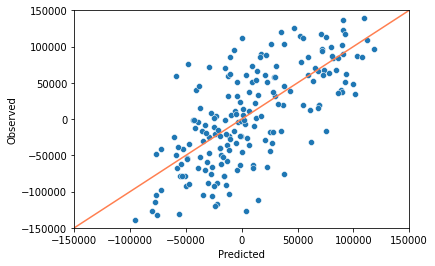

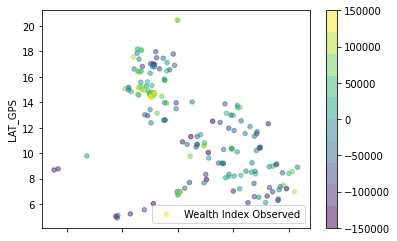

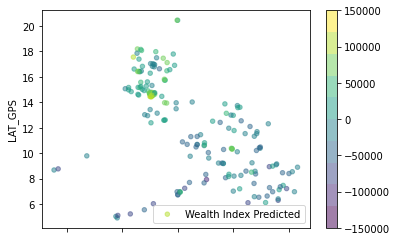

In [ ]:
# WEALTH INDEX 

matched_threshold = matched_with_ind[matched_with_ind['DISTANCE(M)'] < 500]

#assign variables
data = matched_threshold.values
X, y = data[:, 5:4007], data[:,4008]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

#save test set lat/lons for later
plotting_coords = X_test[:,0:2]

#remove lat/lons columns
X_train = X_train[:,2:]
X_test = X_test[:,2:]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)

# define model
model = RidgeCV(alphas=[0.001, 0.01,1,10], cv=cv) #alphas here refer to lambda values to try

# fit model
model.fit(X_train, y_train)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

#predict model
y_pred = model.predict(X_test)

#save test set lat/lons for later
plotting_coords = X_test[:,0:2]

#get R^2 from true and predicted values
train_r2 = model.score(X_train, y_train)
print("Train R2 score:", train_r2)
test_r2 = model.score(X_test, y_test)
print("Test R2 score:", test_r2)

print('r2: %f' % r2_score(y_test,y_pred))

#scatterplot
line_x = np.linspace(min(y_test), max(y_test), 100)
line_y = line_x

ax = sns.scatterplot(x=y_pred, y=y_test)
plt.plot(line_x, line_y, color='coral')
ax.set_xlim([-150000, 150000])
ax.set_ylim([-150000, 150000])
ax.set(xlabel='Predicted', ylabel='Observed')


#merge lat/lons with test and predicted values
map_plot = pd.DataFrame(plotting_coords, 
                        columns = ['LAT_GPS', 'LON_GPS'])
map_plot['predicted'] = y_pred
map_plot['observed'] = y_test

# Define the range of values to use for the colormap
cmap_range = (-150000, 150000)

# Create the scatterplot for the observed
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['observed'], label="Wealth Index Observed",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)

# Create the scatterplot for the predicted
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['predicted'], label="Wealth Index Predicted",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)

# Show the plot
plt.show()

In [ ]:
map_plot['residual'] = abs(map_plot['observed']-map_plot['predicted'])
map_plot

,LAT_GPS,LON_GPS,predicted,observed,residual
0,14.5846,121.028628,90828.931722,122731.466667,31902.534944
1,14.744355,121.030594,93351.250622,62314.7,31036.550622
2,14.675253,121.024664,108940.005987,173558.555556,64618.549569
3,10.381808,124.96598,-27883.346595,7728.44,35611.786595
4,14.59344,121.013554,72159.070469,96009.35,23850.279531
...,...,...,...,...,...
192,14.744575,121.167939,10242.471980,180158.35,169915.87802
193,14.552518,121.061429,112661.708916,109741.95,2919.758916
194,13.607046,124.237632,3637.429997,61152.291667,57514.861669
195,14.428344,121.022274,99987.965828,169458.333333,69470.367506


alpha: 10.000000
Train R2 score: 0.5727162340020608
Test R2 score: 0.5016760144785778
r2: 0.501676


<ipython-input-70-2bd831fa0978>:69: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
<ipython-input-70-2bd831fa0978>:77: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use


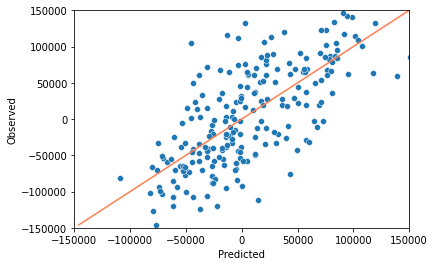

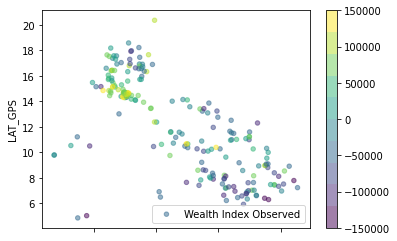

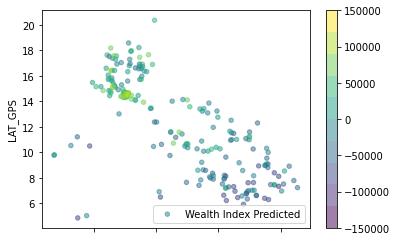

In [ ]:
matched_threshold = matched_with_ind[matched_with_ind['DISTANCE(M)'] < 555]

# WEALTH INDEX 
#assign variables
data = matched_threshold.values
X, y = data[:, 5:4007], data[:,4008]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

#save test set lat/lons for later
plotting_coords = X_test[:,0:2]

#remove lat/lons columns
X_train = X_train[:,2:]
X_test = X_test[:,2:]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)

# define model
model = RidgeCV(alphas=[0.001, 0.01,1,10], cv=cv) #alphas here refer to lambda values to try

# fit model
model.fit(X_train, y_train)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)

#predict model
y_pred = model.predict(X_test)

#save test set lat/lons for later
plotting_coords = X_test[:,0:2]

#get R^2 from true and predicted values
train_r2 = model.score(X_train, y_train)
print("Train R2 score:", train_r2)
test_r2 = model.score(X_test, y_test)
print("Test R2 score:", test_r2)

print('r2: %f' % r2_score(y_test,y_pred))

#scatterplot
line_x = np.linspace(min(y_test), max(y_test), 100)
line_y = line_x

ax = sns.scatterplot(x=y_pred, y=y_test)
plt.plot(line_x, line_y, color='coral')
ax.set_xlim([-150000, 150000])
ax.set_ylim([-150000, 150000])
ax.set(xlabel='Predicted', ylabel='Observed')


#merge lat/lons with test and predicted values
map_plot = pd.DataFrame(plotting_coords, 
                        columns = ['LAT_GPS', 'LON_GPS'])
map_plot['predicted'] = y_pred
map_plot['observed'] = y_test

# Define the range of values to use for the colormap
cmap_range = (-150000, 150000)

# Create the scatterplot for the observed
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['observed'], label="Wealth Index Observed",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)

# Create the scatterplot for the predicted
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['predicted'], label="Wealth Index Predicted",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)

# Show the plot
plt.show()

In [ ]:
map_plot['residual'] = abs(map_plot['observed']-map_plot['predicted'])
map_plot

,LAT_GPS,LON_GPS,predicted,observed,residual
0,10.36527,123.015725,-24491.375868,-58230.916667,33739.540799
1,11.599062,125.003516,-38489.155188,-34028.809524,4460.345664
2,15.300763,120.886981,-1218.648046,44979.26087,46197.908915
3,9.179849,124.666319,-13743.535075,-38709.041667,24965.506592
4,13.236875,123.486941,-902.409474,-38756.541667,37854.132192
...,...,...,...,...,...
217,7.611066,124.956051,-79977.445501,-66383.5,13593.945501
218,9.794712,118.728896,14039.496114,-11944.0,25983.496114
219,6.594535,125.224611,-44538.830557,-45738.73913,1199.908574
220,10.390653,123.92703,3329.446361,133020.333333,129690.886972


In [ ]:
# Saving the final csv so we can inspect it

map_plot.to_csv('map_plot', index=False)
map_plot.to_csv(file_path + 'map_plot.csv')

***Random Forest Regression***

In [ ]:
matched_threshold = matched_with_ind[matched_with_ind['DISTANCE(M)'] < 500]

# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

#assign variables
data = matched_threshold.values
X, y = data[:, 5:4007], data[:,4008]

#save test set lat/lons for later
plotting_coords = X_test[:,0:2]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Instantiate the random forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict the values for the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
train_r2 = model.score(X_train, y_train)
print("Train R2 score:", train_r2)
test_r2 = model.score(X_test, y_test)
print("Test R2 score:", test_r2)

print('r2: %f' % r2_score(y_test,y_pred))


Train R2 score: 0.9297347135883632
Test R2 score: 0.42738068453557276
r2: 0.427381


<ipython-input-75-e7456fc60410>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_plot['predicted'] = y_pred
<ipython-input-75-e7456fc60410>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_plot['observed']= y_test
<ipython-input-75-e7456fc60410>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10), 

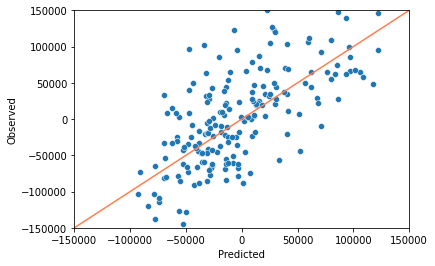

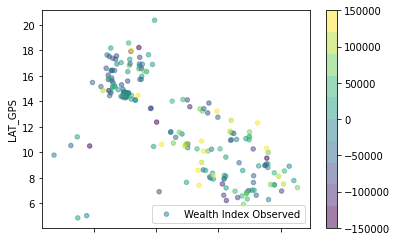

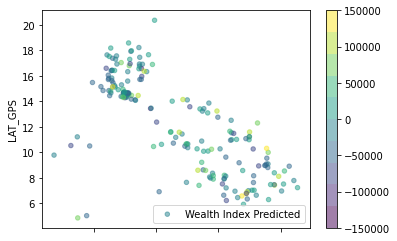

In [ ]:
#scatterplot
line_x = np.linspace(min(y_test), max(y_test), 100)
line_y = line_x

ax = sns.scatterplot(x=y_pred, y=y_test)
plt.plot(line_x, line_y, color='coral')
ax.set_xlim([-150000,150000])
ax.set_ylim([-150000, 150000])
ax.set(xlabel='Predicted', ylabel='Observed')


#merge lat/lons with test and predicted values
map_plot1 = pd.DataFrame(plotting_coords, 
                        columns = ['LAT_GPS', 'LON_GPS'])
map_plot = map_plot1.iloc[0:197, :]
map_plot['predicted'] = y_pred
map_plot['observed']= y_test

# Define the range of values to use for the colormap
cmap_range = (-150000, 150000)

# Create the scatterplot for the observed
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['observed'], label="Wealth Index Observed",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)

# Create the scatterplot for the predicted
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['predicted'], label="Wealth Index Predicted",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)

# Show the plot
plt.show()

In [ ]:
map_plot['residual'] = abs(map_plot['observed']-map_plot['predicted'])
map_plot

<ipython-input-76-f476cb8df3a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_plot['residual'] = abs(map_plot['observed']-map_plot['predicted'])


,LAT_GPS,LON_GPS,predicted,observed,residual
0,10.36527,123.015725,-25792.202235,-23317.961538,2474.240696
1,11.599062,125.003516,105592.111417,64637.692308,40954.419109
2,15.300763,120.886981,-13695.510134,-83963.454545,70267.944412
3,9.179849,124.666319,-51462.456115,-40901.583333,10560.872781
4,13.236875,123.486941,-20082.261909,85677.541667,105759.803576
...,...,...,...,...,...
192,7.783481,126.427539,-2347.396749,23845.941176,26193.337925
193,8.390996,125.798855,24987.040780,34247.368421,9260.327641
194,11.229801,124.998809,-16270.873078,39315.041667,55585.914745
195,10.243612,123.780667,70755.597549,-8930.269231,79685.86678


In [ ]:
matched_threshold = matched_with_ind[matched_with_ind['DISTANCE(M)'] < 555]

# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

#assign variables
data = matched_threshold.values
X, y = data[:, 5:4007], data[:,4008]

#save test set lat/lons for later
plotting_coords = X_test[:,0:2]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Instantiate the random forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict the values for the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
train_r2 = model.score(X_train, y_train)
print("Train R2 score:", train_r2)
test_r2 = model.score(X_test, y_test)
print("Test R2 score:", test_r2)

print('r2: %f' % r2_score(y_test,y_pred))

Train R2 score: 0.9306492367705942
Test R2 score: 0.5511997394670929
r2: 0.551200


<ipython-input-78-d3fec4cf0e8b>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
<ipython-input-78-d3fec4cf0e8b>:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use


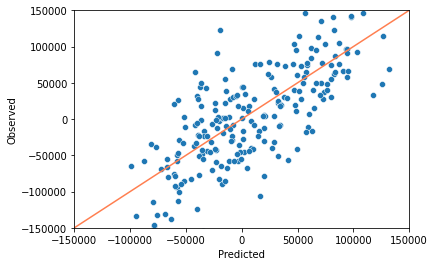

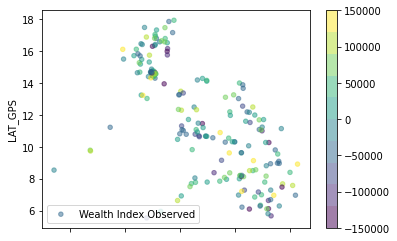

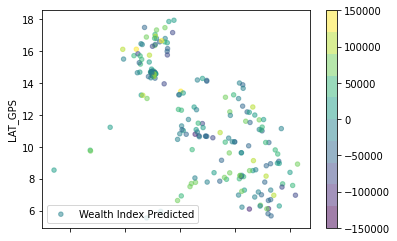

In [ ]:
#scatterplot
line_x = np.linspace(min(y_test), max(y_test), 100)
line_y = line_x

ax = sns.scatterplot(x=y_pred, y=y_test)
plt.plot(line_x, line_y, color='coral')
ax.set_xlim([-150000, 150000])
ax.set_ylim([-150000, 150000])
ax.set(xlabel='Predicted', ylabel='Observed')


#merge lat/lons with test and predicted values
map_plot = pd.DataFrame(plotting_coords, 
                        columns = ['LAT_GPS', 'LON_GPS'])
map_plot['predicted'] = pd.DataFrame(y_pred).iloc[0:197,:]
map_plot['observed']= pd.DataFrame(y_test).iloc[0:197,:]

# Define the range of values to use for the colormap
cmap_range = (-150000, 150000)

# Create the scatterplot for the observed
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['observed'], label="Wealth Index Observed",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)

# Create the scatterplot for the predicted
map_plot.plot(kind="scatter", x="LON_GPS", y="LAT_GPS", 
    c=map_plot['predicted'], label="Wealth Index Predicted",
    cmap=cm.get_cmap("viridis", 10),  # 10 is the number of discrete colors to use
    vmin=cmap_range[0], vmax=cmap_range[1],
    colorbar=True, alpha=0.5
)

# Show the plot
plt.show()

In [ ]:
map_plot['residual'] = abs(map_plot['observed']-map_plot['predicted'])
map_plot

,LAT_GPS,LON_GPS,predicted,observed,residual
0,16.782284,121.148788,-11066.274406,-58278.72,47212.445594
1,16.444833,120.588388,-20515.634127,-1967.347826,18548.286301
2,17.305717,121.151863,64474.997276,15807.391304,48667.605972
3,7.784124,122.992546,-17864.448675,842.769231,18707.217905
4,16.506832,121.542519,19783.147105,5544.217391,14238.929714
...,...,...,...,...,...
192,8.954349,125.61305,9660.267180,-41633.157895,51293.425075
193,8.192387,124.185825,70267.043809,32883.684211,37383.359598
194,17.143283,121.737711,-77010.925367,-38566.181818,38444.743548
195,14.668919,120.937494,-23991.369380,-41885.681818,17894.312438


In [ ]:
matched_threshold = matched_with_ind[matched_with_ind['DISTANCE(M)'] < 555]
len(matched_threshold)


1110

**Ridge regression**

Distance < 500 \
R^2 = 0.523750

Distance < 555 \
R^2 = 0.501676 


**Random forest regression**

Distance < 500 \
R^2 = 0.42738068453557276

Distance < 555 \
R^2 = 0.5511997394670929